## 1)

In [24]:
pip install ucimlrepo

In [25]:
from ucimlrepo import fetch_ucirepo
from sklearn.manifold import TSNE
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

print((len(X) - round(len(X)*0.7))/len(X))

treino = X.iloc[0:round(len(X)*0.7)]
teste = X.iloc[round(len(X)*0.7):len(X)]

target_treino = y.iloc[0:round(len(X)*0.7)]
target_teste = y.iloc[round(len(X)*0.7):len(X)]

display(treino)
display(teste)
display(target_treino)


0.30052724077328646


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,0.06606,...,26.23,28.74,172.00,2081.0,0.15020,0.5717,0.7053,0.24220,0.3828,0.10070
394,12.10,17.72,78.07,446.2,0.10290,0.09758,0.04783,0.03326,0.1937,0.06161,...,13.56,25.80,88.33,559.5,0.14320,0.1773,0.1603,0.06266,0.3049,0.07081
395,14.06,17.18,89.75,609.1,0.08045,0.05361,0.02681,0.03251,0.1641,0.05764,...,14.92,25.34,96.42,684.5,0.10660,0.1231,0.0846,0.07911,0.2523,0.06609
396,13.51,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.05381,0.1806,0.06079,...,14.80,27.20,97.33,675.2,0.14280,0.2570,0.3438,0.14530,0.2666,0.07686


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
398,11.06,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,0.1535,0.06214,...,12.680,20.35,80.79,496.7,0.11200,0.18790,0.2079,0.05556,0.2590,0.09158
399,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.016380,0.1847,0.06019,...,13.450,24.49,86.00,562.0,0.12440,0.17260,0.1449,0.05356,0.2779,0.08121
400,17.91,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.119800,0.2113,0.07115,...,20.800,27.78,149.60,1304.0,0.18730,0.59170,0.9034,0.19640,0.3245,0.11980
401,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.017960,0.1601,0.05541,...,13.800,20.14,87.64,589.5,0.13740,0.15750,0.1514,0.06876,0.2460,0.07262
402,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.018830,0.1874,0.05899,...,14.130,24.61,96.31,621.9,0.09329,0.23180,0.1604,0.06608,0.3207,0.07247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.152000,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400


,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
393,M
394,B
395,B
396,B


### a)

Os valores de média e desvio padrão obtidos mostram uma grande variação entre os parâmetros quanto a escala de valores. Enquanto alguns parâmetros tem valores bem próximos de zero e sem muita variação, há parãmetros com valores na casa das centenas com desvio padrão também na casa das centenas.

In [26]:
print('Média e desvio padrão para classe M')
display(treino.loc[target_treino.Diagnosis == 'M'].describe().loc[['mean','std']])
print('Média e desvio padrão para classe B')
display(treino.loc[target_treino.Diagnosis == 'B'].describe().loc[['mean','std']])

Média e desvio padrão para classe M


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
mean,17.274162,21.360983,114.029653,957.232370,0.103080,0.144564,0.156944,0.086749,0.193865,0.062774,...,20.980578,29.152312,140.086185,1400.997110,0.145659,0.376277,0.443207,0.181295,0.329265,0.091952
std,3.215195,3.795245,21.882764,362.544383,0.013071,0.054986,0.074200,0.034618,0.028619,0.007837,...,4.275420,5.519159,29.241505,584.936603,0.022424,0.173656,0.174275,0.046430,0.077451,0.022062


Média e desvio padrão para classe B


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
mean,12.076440,17.127156,77.581689,457.226222,0.092321,0.078284,0.04645,0.025385,0.175124,0.062804,...,13.259400,22.408444,86.098978,548.620000,0.123747,0.175684,0.161529,0.072195,0.271338,0.078731
std,1.731315,3.359781,11.437250,128.977373,0.012719,0.033274,0.04925,0.016313,0.025612,0.006771,...,1.926465,4.832299,13.132041,156.637776,0.019480,0.091804,0.152275,0.036115,0.043836,0.013912


### b)

Pelo gráfico obtido ao se utilizar o TSNE vemos que há possibilidade de separação das amostras em dois grupos, embora para algumas amostras seja possível uma classificação errada devido a não haver uma separação clara no TSNE 2D.

Text(0.5, 1.0, 'TSNE')

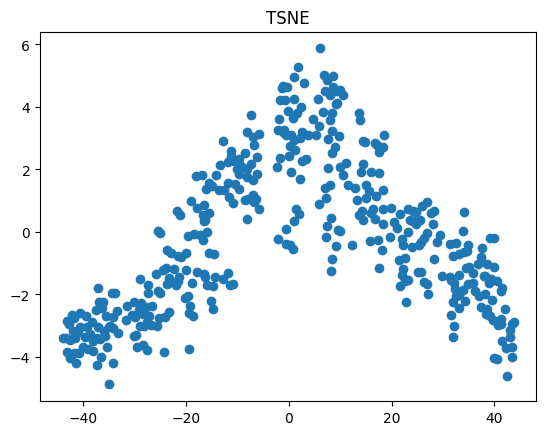

In [27]:
tsne_treino = TSNE().fit_transform(treino)
# display(tsne_treino)
# color = [target_treino.loc[i,['Diagnosis']]['Diagnosis'] for i in range(len(target_treino))]
# for i in range(len(color)):
#   if color[i] == 'M':
#     color[i] = '#1f77b4'
#   else:
#     color[i] = '#2ca02c'
# display(color)
# plt.scatter(tsne_treino[:,0], tsne_treino[:,1], c=color)
plt.scatter(tsne_treino[:,0], tsne_treino[:,1])
plt.title("TSNE")

### c)

In [28]:
correl = treino.corr()
# display(correl>0.9)
## display(np.where(correl>0.9))
## display(correl.drop(columns=np.whee(correl>0.9)[0]))

diag_ones = (2*np.ones(len(correl)) - np.triu(np.ones(len(correl)))) - np.tril(np.ones(len(correl)))
# display(diag_ones)
non_redundant = correl[((diag_ones*correl)<=0.9)&((diag_ones*correl)!=1)]
# display(non_redundant)
non_redundant = non_redundant.dropna(axis=1)
# display(non_redundant)
treino_non_redundant = treino[non_redundant.columns]
teste_non_redundant = teste[non_redundant.columns]
display(treino_non_redundant)
display(teste_non_redundant)

,smoothness1,compactness1,symmetry1,fractal_dimension1,texture2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,smoothness3,compactness3,concavity3,symmetry3,fractal_dimension3
0,0.11840,0.27760,0.2419,0.07871,0.9053,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,0.16220,0.6656,0.7119,0.4601,0.11890
1,0.08474,0.07864,0.1812,0.05667,0.7339,0.005225,0.01308,0.01860,0.013400,0.01389,0.003532,0.12380,0.1866,0.2416,0.2750,0.08902
2,0.10960,0.15990,0.2069,0.05999,0.7869,0.006150,0.04006,0.03832,0.020580,0.02250,0.004571,0.14440,0.4245,0.4504,0.3613,0.08758
3,0.14250,0.28390,0.2597,0.09744,1.1560,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,0.20980,0.8663,0.6869,0.6638,0.17300
4,0.10030,0.13280,0.1809,0.05883,0.7813,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,0.13740,0.2050,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.11670,0.20870,0.2162,0.06606,0.9209,0.005215,0.03726,0.04718,0.012880,0.02045,0.004028,0.15020,0.5717,0.7053,0.3828,0.10070
394,0.10290,0.09758,0.1937,0.06161,1.6520,0.008146,0.01631,0.01843,0.007513,0.02015,0.001798,0.14320,0.1773,0.1603,0.3049,0.07081
395,0.08045,0.05361,0.1641,0.05764,1.6850,0.005371,0.01273,0.01132,0.009155,0.01719,0.001444,0.10660,0.1231,0.0846,0.2523,0.06609
396,0.10590,0.11470,0.1806,0.06079,1.3320,0.005442,0.01957,0.03304,0.013670,0.01315,0.002464,0.14280,0.2570,0.3438,0.2666,0.07686


,smoothness1,compactness1,symmetry1,fractal_dimension1,texture2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,smoothness3,compactness3,concavity3,symmetry3,fractal_dimension3
398,0.07741,0.04768,0.1535,0.06214,0.6881,0.004259,0.01469,0.01940,0.004168,0.01191,0.003537,0.11200,0.18790,0.2079,0.2590,0.09158
399,0.09087,0.06232,0.1847,0.06019,1.1400,0.005463,0.01964,0.02079,0.005398,0.01477,0.003071,0.12440,0.17260,0.1449,0.2779,0.08121
400,0.12300,0.25760,0.2113,0.07115,0.7747,0.007159,0.03718,0.06165,0.010510,0.01591,0.005099,0.18730,0.59170,0.9034,0.3245,0.11980
401,0.08872,0.05242,0.1601,0.05541,1.0450,0.006175,0.01204,0.01376,0.005832,0.01096,0.001857,0.13740,0.15750,0.1514,0.2460,0.07262
402,0.07351,0.07899,0.1874,0.05899,1.2990,0.003629,0.03713,0.03452,0.010650,0.02632,0.003705,0.09329,0.23180,0.1604,0.3207,0.07247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.11100,0.11590,0.1726,0.05623,1.2560,0.010300,0.02891,0.05198,0.024540,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115
565,0.09780,0.10340,0.1752,0.05533,2.4630,0.005769,0.02423,0.03950,0.016780,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637
566,0.08455,0.10230,0.1590,0.05648,1.0750,0.005903,0.03731,0.04730,0.015570,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820
567,0.11780,0.27700,0.2397,0.07016,1.5950,0.006522,0.06158,0.07117,0.016640,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400


### d)

,smoothness1,compactness1,symmetry1,fractal_dimension1,texture2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,smoothness3,compactness3,concavity3,symmetry3,fractal_dimension3
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.096998,0.107094,0.183271,0.062791,1.197527,0.007021,0.026282,0.033117,0.012115,0.021205,0.003875,0.133272,0.262877,0.283967,0.296518,0.084478
std,0.013922,0.054926,0.028487,0.007245,0.539097,0.003073,0.019225,0.033462,0.006447,0.009067,0.002896,0.023457,0.166533,0.213981,0.067155,0.019056
min,0.062510,0.019380,0.116700,0.049960,0.360200,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,0.071170,0.027290,0.000000,0.156500,0.055040
25%,0.086987,0.066713,0.163500,0.057563,0.826875,0.005215,0.013413,0.015522,0.007968,0.015205,0.002214,0.117025,0.146075,0.112975,0.255175,0.071165
50%,0.096935,0.095840,0.180950,0.061400,1.067500,0.006301,0.020780,0.026355,0.011220,0.018955,0.003195,0.132350,0.220200,0.243300,0.285150,0.080195
75%,0.106175,0.133400,0.196700,0.065975,1.463750,0.008097,0.033687,0.042637,0.015043,0.024047,0.004560,0.148025,0.354125,0.396500,0.325450,0.092560
max,0.144700,0.345400,0.304000,0.097440,4.885000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,0.222600,1.058000,1.252000,0.663800,0.207500


[array([0.02261307, 0.06030151, 0.17085427, 0.21356784, 0.22613065,
        0.15075377, 0.11055276, 0.02512563, 0.01256281, 0.00753769]),
 array([0.11809045, 0.3040201 , 0.22110553, 0.15829146, 0.10301508,
        0.04773869, 0.02763819, 0.00753769, 0.01005025, 0.00251256]),
 array([0.02512563, 0.11557789, 0.23366834, 0.27386935, 0.20603015,
        0.07788945, 0.03517588, 0.02261307, 0.00502513, 0.00502513]),
 array([0.07788945, 0.2839196 , 0.29899497, 0.16582915, 0.0879397 ,
        0.05276382, 0.0201005 , 0.00502513, 0.00251256, 0.00502513]),
 array([0.23366834, 0.39698492, 0.22613065, 0.09045226, 0.03517588,
        0.01005025, 0.00251256, 0.00251256, 0.        , 0.00251256]),
 array([0.16834171, 0.53015075, 0.20854271, 0.05527638, 0.02261307,
        0.00753769, 0.00251256, 0.00251256, 0.        , 0.00251256]),
 array([0.35427136, 0.3040201 , 0.19849246, 0.06532663, 0.03517588,
        0.01256281, 0.01758794, 0.01005025, 0.        , 0.00251256]),
 array([0.72361809, 0.2160804 , 0.

[2.7929232578333147,
 2.620479807449189,
 2.6217788022429174,
 2.4973351593435478,
 2.1194734263842783,
 1.862504305204839,
 2.2129226154839454,
 1.132369147941993,
 2.161666780926907,
 2.1100475266943577,
 1.4098711960976489,
 2.6739931582599343,
 2.501832265268997,
 2.543442910430135,
 2.3330722514144857,
 2.172008684502034]

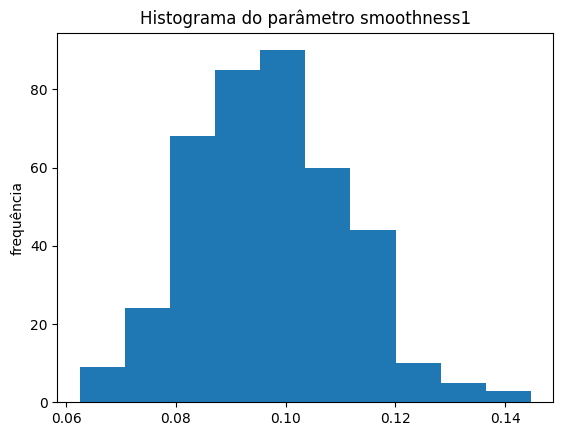

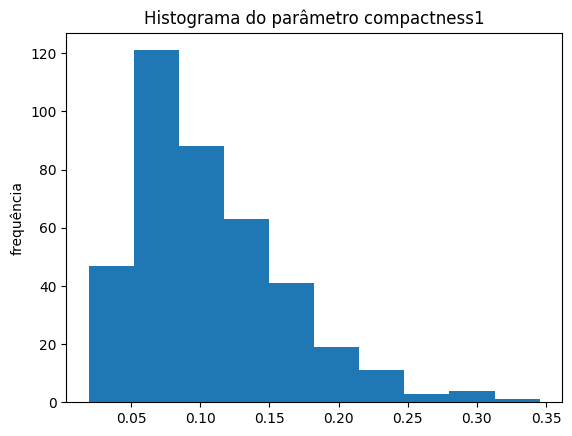

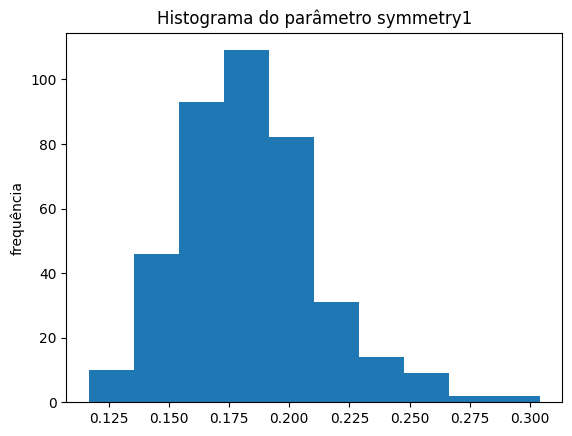

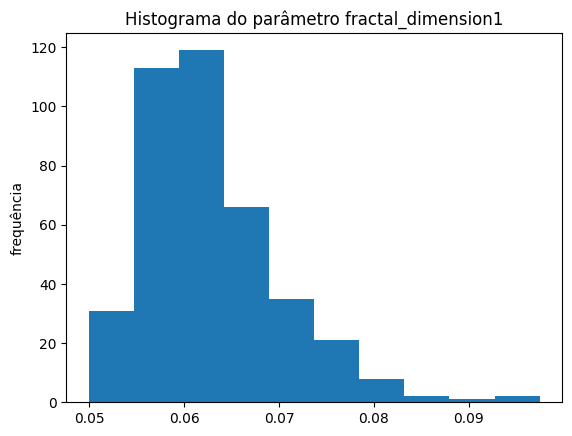

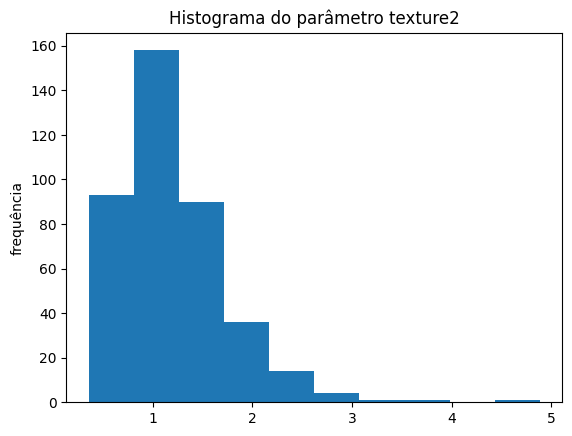

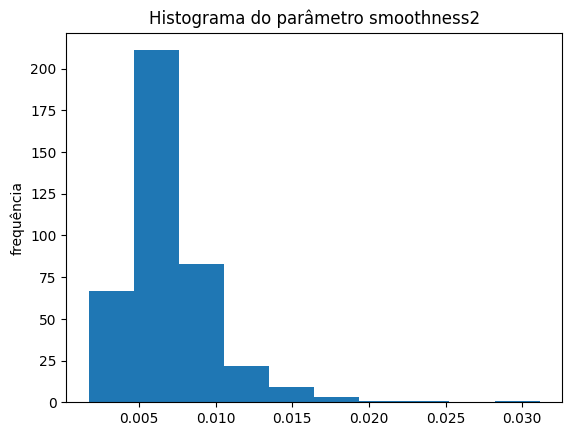

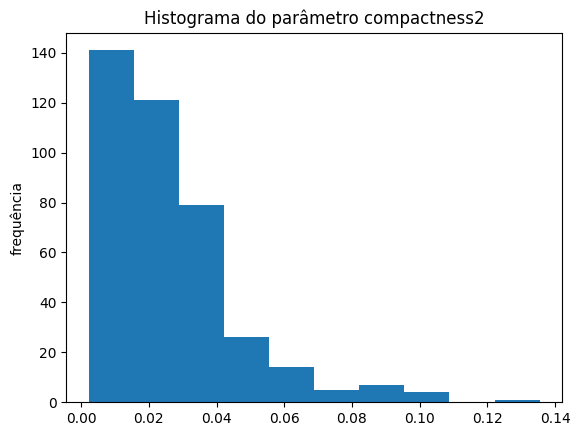

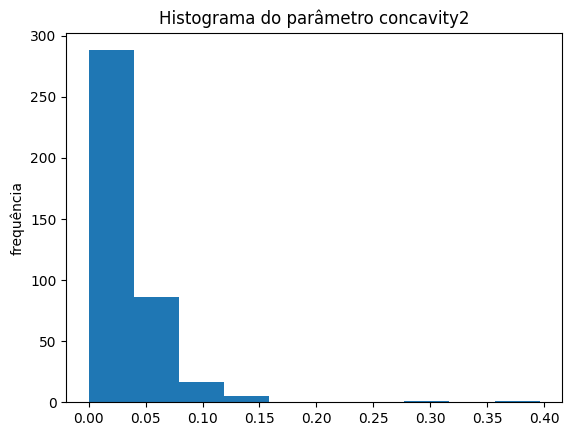

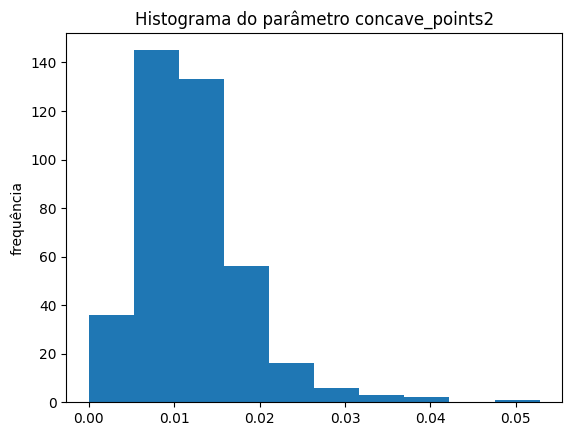

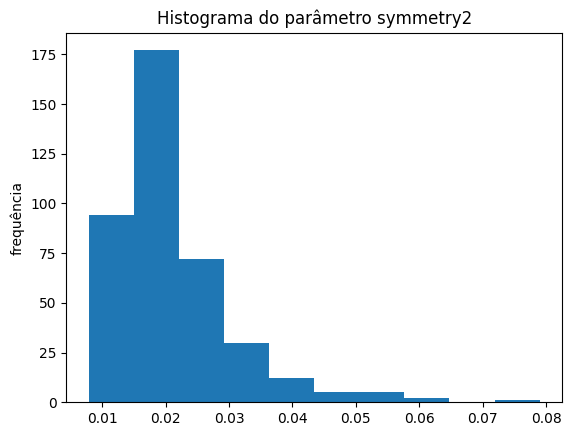

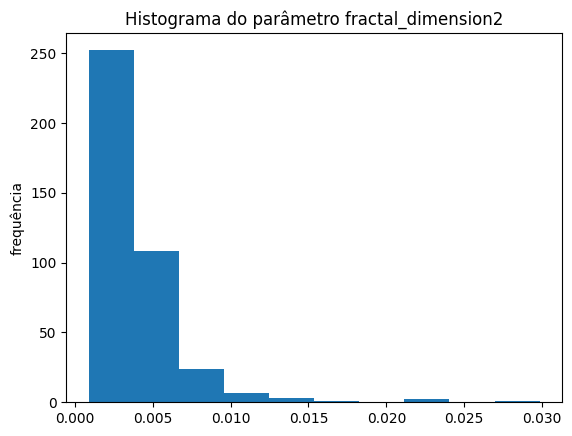

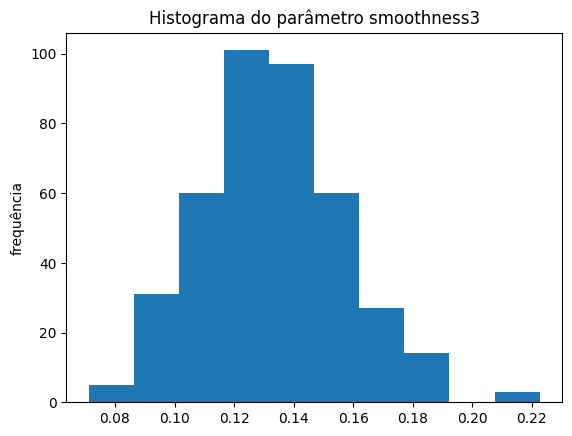

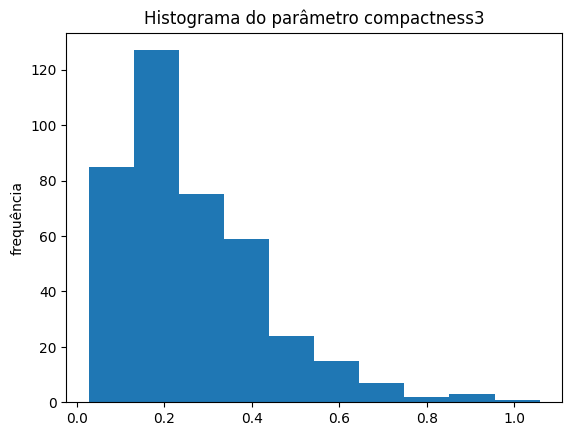

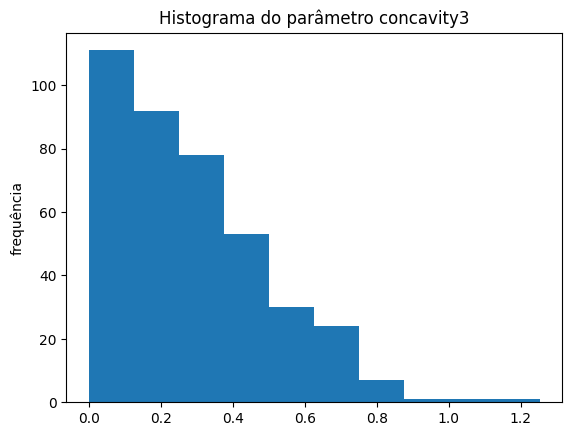

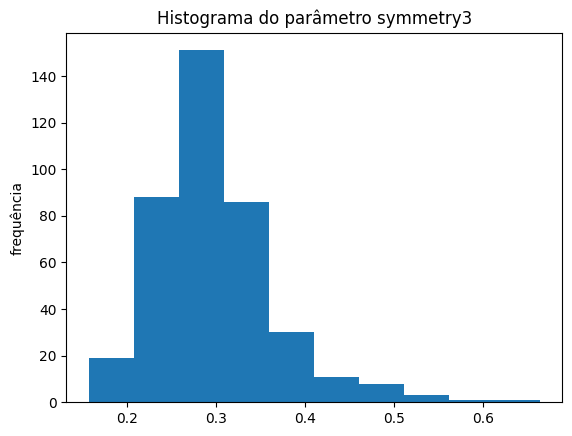

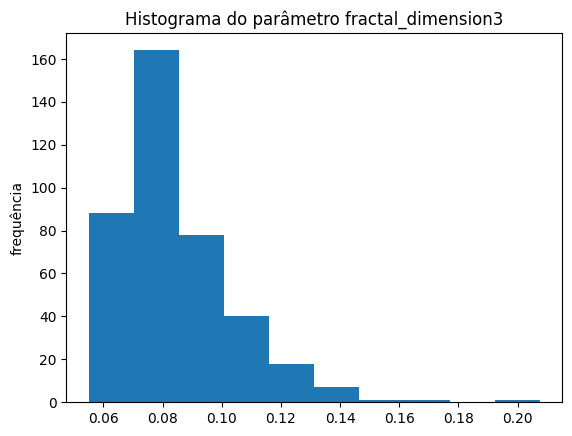

In [29]:
display(treino_non_redundant.describe())
h = []
p = []
for i in range(len(treino_non_redundant.columns)):
  plt.figure(i)
  n,_,_ = plt.hist(treino_non_redundant[treino_non_redundant.columns[i]])
  plt.title("Histograma do parâmetro " + treino_non_redundant.columns[i])
  plt.ylabel("frequência")
  prob = n/sum(n)
  p.insert(len(p),prob)
  h.insert(len(h),-sum(prob*np.log2((n==0)+prob)))
display(p)
display(h)

array([0.43467337, 0.56532663])

0.98765112455122

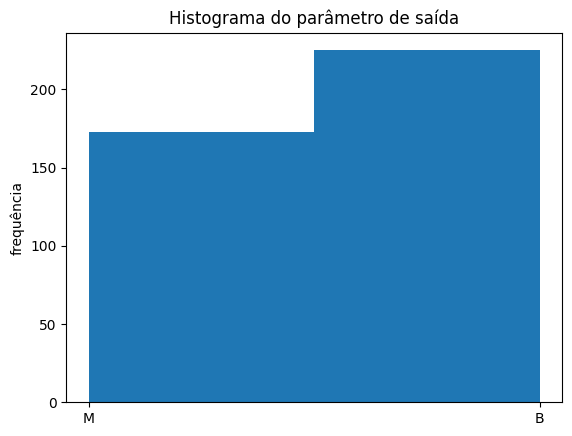

In [30]:
plt.figure(100)
n,_,_ = plt.hist(target_treino,len(target_treino.drop_duplicates()))
plt.title("Histograma do parâmetro de saída")
plt.ylabel("frequência")
p_target = n/sum(n)
display(p_target)
h_target = -sum(p_target*np.log2((n==0) + p_target))
display(h_target)

In [31]:
display(treino_non_redundant)
display(target_treino)

temp = pd.concat([treino_non_redundant,target_treino], axis=1)
h_in2out = []
p = []
freq = []
for i in range(len(treino_non_redundant.columns)):
  freq.insert(len(freq),(temp[temp.columns[[i,16]]].value_counts()).tolist())
n = sum([sum(freq) for freq in freq])

for i in range(len(treino_non_redundant.columns)):
  prob = [(freq/n) for freq in freq[i]]
  p.insert(len(p),prob)
  h_in2out.insert(len(h_in2out),-sum((prob)*np.log2(prob)))
# display(sum([item for row in p for item in row]))
display(h_in2out)

,smoothness1,compactness1,symmetry1,fractal_dimension1,texture2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,smoothness3,compactness3,concavity3,symmetry3,fractal_dimension3
0,0.11840,0.27760,0.2419,0.07871,0.9053,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,0.16220,0.6656,0.7119,0.4601,0.11890
1,0.08474,0.07864,0.1812,0.05667,0.7339,0.005225,0.01308,0.01860,0.013400,0.01389,0.003532,0.12380,0.1866,0.2416,0.2750,0.08902
2,0.10960,0.15990,0.2069,0.05999,0.7869,0.006150,0.04006,0.03832,0.020580,0.02250,0.004571,0.14440,0.4245,0.4504,0.3613,0.08758
3,0.14250,0.28390,0.2597,0.09744,1.1560,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,0.20980,0.8663,0.6869,0.6638,0.17300
4,0.10030,0.13280,0.1809,0.05883,0.7813,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,0.13740,0.2050,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.11670,0.20870,0.2162,0.06606,0.9209,0.005215,0.03726,0.04718,0.012880,0.02045,0.004028,0.15020,0.5717,0.7053,0.3828,0.10070
394,0.10290,0.09758,0.1937,0.06161,1.6520,0.008146,0.01631,0.01843,0.007513,0.02015,0.001798,0.14320,0.1773,0.1603,0.3049,0.07081
395,0.08045,0.05361,0.1641,0.05764,1.6850,0.005371,0.01273,0.01132,0.009155,0.01719,0.001444,0.10660,0.1231,0.0846,0.2523,0.06609
396,0.10590,0.11470,0.1806,0.06079,1.3320,0.005442,0.01957,0.03304,0.013670,0.01315,0.002464,0.14280,0.2570,0.3438,0.2666,0.07686


,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
393,M
394,B
395,B
396,B


[0.7789505416092561,
 0.7866483352663943,
 0.7773801898504621,
 0.7843312989124113,
 0.7863342649146355,
 0.7866483352663943,
 0.7872764759699119,
 0.7835623609488057,
 0.7835623609488057,
 0.7855875803194464,
 0.7872764759699119,
 0.7734928017376854,
 0.7853920538593591,
 0.7851327127075998,
 0.7841357724523239,
 0.7869624056181531]

In [32]:
# display(h_target)
# display(h)
# display(h_in2out)
m = h_target + h - h_in2out
display(m)
display(sorted(m))
display(sorted(np.argsort(m)[(len(m)-10):len(m)]))
treino_non_redundant = treino_non_redundant[treino_non_redundant.columns[sorted(np.argsort(m)[(len(m)-10):len(m)])]]
teste_non_redundant = teste_non_redundant[teste_non_redundant.columns[sorted(np.argsort(m)[(len(m)-10):len(m)])]]
display(treino_non_redundant)
display(teste_non_redundant)

array([3.00162384, 2.8214826 , 2.83204974, 2.70065498, 2.32079029,
       2.06350709, 2.41329726, 1.33645791, 2.36575554, 2.31211107,
       1.61024584, 2.88815148, 2.70409134, 2.74596132, 2.5365876 ,
       2.3726974 ])

[1.3364579115444073,
 1.610245844678957,
 2.0635070944896645,
 2.3121110709261314,
 2.3207902860208627,
 2.3657555445293212,
 2.372697403435101,
 2.4132972640652537,
 2.536587603513382,
 2.7006549849823567,
 2.704091335960858,
 2.7459613222737556,
 2.8214825967340147,
 2.8320497369436755,
 2.8881514810734688,
 3.0016238407752787]

[0, 1, 2, 3, 6, 11, 12, 13, 14, 15]

,smoothness1,compactness1,symmetry1,fractal_dimension1,compactness2,smoothness3,compactness3,concavity3,symmetry3,fractal_dimension3
0,0.11840,0.27760,0.2419,0.07871,0.04904,0.16220,0.6656,0.7119,0.4601,0.11890
1,0.08474,0.07864,0.1812,0.05667,0.01308,0.12380,0.1866,0.2416,0.2750,0.08902
2,0.10960,0.15990,0.2069,0.05999,0.04006,0.14440,0.4245,0.4504,0.3613,0.08758
3,0.14250,0.28390,0.2597,0.09744,0.07458,0.20980,0.8663,0.6869,0.6638,0.17300
4,0.10030,0.13280,0.1809,0.05883,0.02461,0.13740,0.2050,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...
393,0.11670,0.20870,0.2162,0.06606,0.03726,0.15020,0.5717,0.7053,0.3828,0.10070
394,0.10290,0.09758,0.1937,0.06161,0.01631,0.14320,0.1773,0.1603,0.3049,0.07081
395,0.08045,0.05361,0.1641,0.05764,0.01273,0.10660,0.1231,0.0846,0.2523,0.06609
396,0.10590,0.11470,0.1806,0.06079,0.01957,0.14280,0.2570,0.3438,0.2666,0.07686


,smoothness1,compactness1,symmetry1,fractal_dimension1,compactness2,smoothness3,compactness3,concavity3,symmetry3,fractal_dimension3
398,0.07741,0.04768,0.1535,0.06214,0.01469,0.11200,0.18790,0.2079,0.2590,0.09158
399,0.09087,0.06232,0.1847,0.06019,0.01964,0.12440,0.17260,0.1449,0.2779,0.08121
400,0.12300,0.25760,0.2113,0.07115,0.03718,0.18730,0.59170,0.9034,0.3245,0.11980
401,0.08872,0.05242,0.1601,0.05541,0.01204,0.13740,0.15750,0.1514,0.2460,0.07262
402,0.07351,0.07899,0.1874,0.05899,0.03713,0.09329,0.23180,0.1604,0.3207,0.07247
...,...,...,...,...,...,...,...,...,...,...
564,0.11100,0.11590,0.1726,0.05623,0.02891,0.14100,0.21130,0.4107,0.2060,0.07115
565,0.09780,0.10340,0.1752,0.05533,0.02423,0.11660,0.19220,0.3215,0.2572,0.06637
566,0.08455,0.10230,0.1590,0.05648,0.03731,0.11390,0.30940,0.3403,0.2218,0.07820
567,0.11780,0.27700,0.2397,0.07016,0.06158,0.16500,0.86810,0.9387,0.4087,0.12400


### e)

In [33]:
### Rocchio

treino_treino0, treino_validacao0, target_treino_treino0, target_validacao0 = train_test_split(treino_non_redundant, target_treino, test_size=0.2,
                                                                                          #  random_state=1,
                                                                                           stratify = target_treino)

model = neighbors.NearestCentroid()
model.fit(treino_treino0, np.ravel(target_treino_treino0))
# print(model.centroids_)
target_pred0 = model.predict(treino_validacao0)
acc = model.score(treino_validacao0, target_validacao0)
print(f"Acurácia do Rocchio do sklearn para parâmetros selecionados: {acc*100}%")

Acurácia do Rocchio do sklearn para parâmetros selecionados: 85.0%


In [34]:
### kNN

treino_treino1, treino_validacao1, target_treino_treino1, target_validacao1 = train_test_split(treino_non_redundant, target_treino, test_size=0.2,
                                                                                          #  random_state=1,
                                                                                           stratify = target_treino)

model = neighbors.KNeighborsClassifier(n_neighbors = 3)
model.fit(treino_treino1, np.ravel(target_treino_treino1))
model.predict(treino_validacao1)
acc = model.score(treino_validacao1, target_validacao1)
print(f"Acurácia 3NN: {acc*100}%")

#k-fold
cv_scores = cross_val_score(model, treino_non_redundant, np.ravel(target_treino), cv=5, scoring = "accuracy")
print(cv_scores)
print("(k-fold cv=5) cv_scores médio: {}".format(np.mean(cv_scores)))

#Grid Search
model = neighbors.KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 10)}
knn_gscv = GridSearchCV(model, param_grid, cv=5)
knn_gscv.fit(treino_treino1, np.ravel(target_treino_treino1))
print(f"Melhor valor de k do kNN: {knn_gscv.best_params_} e melhor resultado: {knn_gscv.best_score_}")

for dicts in knn_gscv.best_params_:
 k = knn_gscv.best_params_[dicts]

model = neighbors.KNeighborsClassifier(n_neighbors = k)
model.fit(treino_treino1, np.ravel(target_treino_treino1))
target_pred1 = model.predict(treino_validacao1)
acc = model.score(treino_validacao1, np.ravel(target_validacao1))
print(f"Acurácia do {k}NN: {acc*100}%")

Acurácia 3NN: 81.25%
[0.85       0.9        0.8625     0.87341772 0.84810127]
(k-fold cv=5) cv_scores médio: 0.8668037974683545
Melhor valor de k do kNN: {'n_neighbors': 8} e melhor resultado: 0.8898809523809523
Acurácia do 8NN: 83.75%


In [35]:
### Naive Bayes

treino_treino2, treino_validacao2, target_treino_treino2, target_validacao2 = train_test_split(treino_non_redundant, target_treino, test_size=0.2,
                                                                                          #  random_state=1,
                                                                                           stratify = target_treino)

#considerando atributos com distribuição Gaussiana
model = naive_bayes.GaussianNB()
model.fit(treino_treino2, np.ravel(target_treino_treino2))
target_pred2 = model.predict(treino_validacao2)
print("Acurácia de %d amostras usando Gaussiana: %d%%"
  % (treino_validacao2.shape[0], 100*(np.ravel(target_validacao2) == target_pred2).sum()/treino_validacao2.shape[0]))

Acurácia de 80 amostras usando Gaussiana: 78%


### f)

Recall VN Rocchio: 84.84848484848484%% 
Recall VP Rocchio: 82.05128205128204%%
Precisão VN Rocchio: 94.11764705882352%% 
Precisão VP Rocchio: 61.53846153846154%%
Acurácia Rocchio: 84.21052631578947%%

Recall VN kNN: 82.57575757575758%% 
Recall VP kNN: 84.61538461538461%%
Precisão VN kNN: 94.78260869565217%% 
Precisão VP kNN: 58.92857142857143%%
Acurácia kNN: 83.04093567251462%%

Recall VN Naive Bayes distribuição gaussiana: 87.12121212121212%% 
Recall VP Naive Bayes distribuição gaussiana: 64.1025641025641%%
Precisão VN Naive Bayes distribuição gaussiana: 89.14728682170544%% 
Precisão VP Naive Bayes distribuição gaussiana: 59.523809523809526%%
Acurácia Naive Bayes distribuição gaussiana: 81.87134502923976%%



<Figure size 640x480 with 0 Axes>

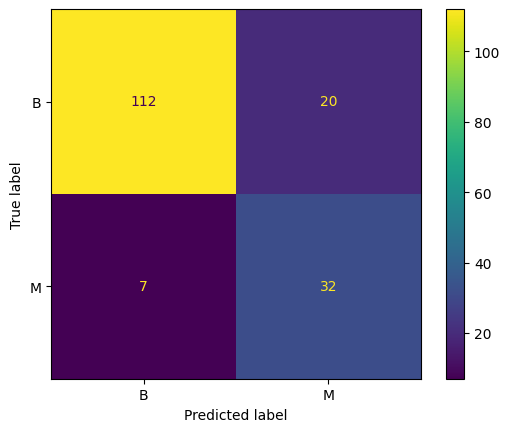

<Figure size 640x480 with 0 Axes>

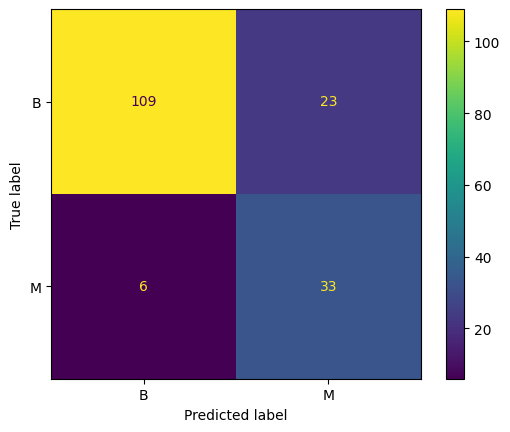

<Figure size 640x480 with 0 Axes>

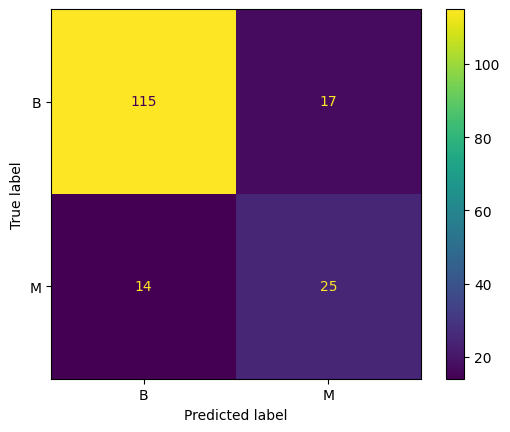

In [36]:
model = neighbors.NearestCentroid()
model.fit(treino_treino0, np.ravel(target_treino_treino0))
target_pred0 = model.predict(teste_non_redundant)

C0 = confusion_matrix(target_teste,target_pred0, labels = np.unique(target_teste))

recall_v = recall_score(target_teste,target_pred0, average=None)
print(f"Recall VN Rocchio: {recall_v[0]*100}%% \nRecall VP Rocchio: {recall_v[1]*100}%%")
precision_v = precision_score(target_teste,target_pred0, average=None)
print(f"Precisão VN Rocchio: {precision_v[0]*100}%% \nPrecisão VP Rocchio: {precision_v[1]*100}%%")
accuracy = accuracy_score(target_teste,target_pred0)
print(f"Acurácia Rocchio: {accuracy*100}%%\n")

model = neighbors.KNeighborsClassifier(n_neighbors = k)
model.fit(treino_treino1, np.ravel(target_treino_treino1))
target_pred1 = model.predict(teste_non_redundant)

C1 = confusion_matrix(target_teste,target_pred1, labels = np.unique(target_teste))

recall_v = recall_score(target_teste,target_pred1, average=None)
print(f"Recall VN kNN: {recall_v[0]*100}%% \nRecall VP kNN: {recall_v[1]*100}%%")
precision_v = precision_score(target_teste,target_pred1, average=None)
print(f"Precisão VN kNN: {precision_v[0]*100}%% \nPrecisão VP kNN: {precision_v[1]*100}%%")
accuracy = accuracy_score(target_teste,target_pred1)
print(f"Acurácia kNN: {accuracy*100}%%\n")

model = naive_bayes.GaussianNB()
model.fit(treino_treino2, np.ravel(target_treino_treino2))
target_pred2 = model.predict(teste_non_redundant)

C2 = confusion_matrix(target_teste,target_pred2, labels = np.unique(target_teste))

recall_v = recall_score(target_teste,target_pred2, average=None)
print(f"Recall VN Naive Bayes distribuição gaussiana: {recall_v[0]*100}%% \nRecall VP Naive Bayes distribuição gaussiana: {recall_v[1]*100}%%")
precision_v = precision_score(target_teste,target_pred2, average=None)
print(f"Precisão VN Naive Bayes distribuição gaussiana: {precision_v[0]*100}%% \nPrecisão VP Naive Bayes distribuição gaussiana: {precision_v[1]*100}%%")
accuracy = accuracy_score(target_teste,target_pred2)
print(f"Acurácia Naive Bayes distribuição gaussiana: {accuracy*100}%%\n")

plt.figure(1000)
ConfusionMatrixDisplay(confusion_matrix=C0, display_labels = np.unique(target_validacao0)).plot()
plt.figure(2000)
ConfusionMatrixDisplay(confusion_matrix=C1, display_labels = np.unique(target_validacao1)).plot()
plt.figure(3000)
ConfusionMatrixDisplay(confusion_matrix=C2, display_labels = np.unique(target_validacao2)).plot()

### g)

Acurácia do Rocchio do sklearn para todos os parâmetros: 85.0%
Acurácia 3NN: 92.5%
[0.85       0.9        0.8625     0.87341772 0.84810127]
(k-fold cv=5) cv_scores médio: 0.8668037974683545
Melhor valor de k do kNN: {'n_neighbors': 7} e melhor resultado: 0.9309027777777776
Acurácia do 7NN: 90.0%
Acurácia de 80 amostras usando Gaussiana: 91%
Recall VN Rocchio: 98.48484848484848%% 
Recall VP Rocchio: 76.92307692307693%%
Precisão VN Rocchio: 93.5251798561151%% 
Precisão VP Rocchio: 93.75%%
Acurácia Rocchio: 93.56725146198829%%

Recall VN kNN: 94.6969696969697%% 
Recall VP kNN: 94.87179487179486%%
Precisão VN kNN: 98.4251968503937%% 
Precisão VP kNN: 84.0909090909091%%
Acurácia kNN: 94.73684210526315%%

Recall VN Naive Bayes distribuição gaussiana: 96.96969696969697%% 
Recall VP Naive Bayes distribuição gaussiana: 94.87179487179486%%
Precisão VN Naive Bayes distribuição gaussiana: 98.46153846153847%% 
Precisão VP Naive Bayes distribuição gaussiana: 90.2439024390244%%
Acurácia Naive Bayes d

<Figure size 640x480 with 0 Axes>

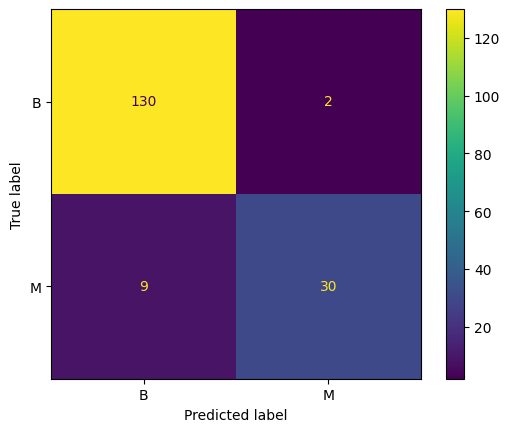

<Figure size 640x480 with 0 Axes>

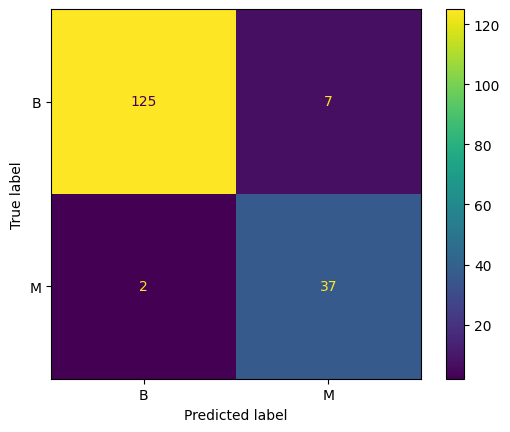

<Figure size 640x480 with 0 Axes>

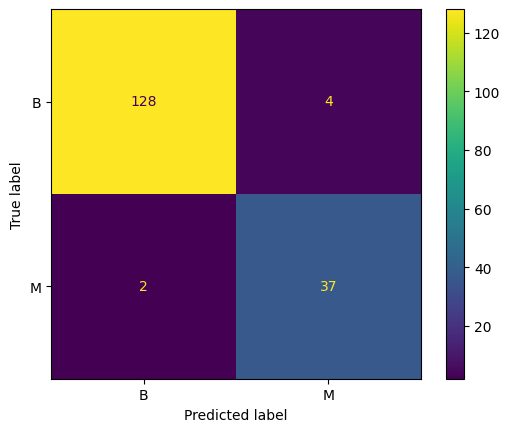

In [37]:
### Rocchio

treino_treino0, treino_validacao0, target_treino_treino0, target_validacao0 = train_test_split(treino, target_treino, test_size=0.2,
                                                                                          #  random_state=1,
                                                                                           stratify = target_treino)

model = neighbors.NearestCentroid()
model.fit(treino_treino0, np.ravel(target_treino_treino0))
# print(model.centroids_)
target_pred0 = model.predict(treino_validacao0)
acc = model.score(treino_validacao0, target_validacao0)
print(f"Acurácia do Rocchio do sklearn para todos os parâmetros: {acc*100}%")

### kNN

treino_treino1, treino_validacao1, target_treino_treino1, target_validacao1 = train_test_split(treino, target_treino, test_size=0.2,
                                                                                          #  random_state=1,
                                                                                           stratify = target_treino)

model = neighbors.KNeighborsClassifier(n_neighbors = 3)
model.fit(treino_treino1, np.ravel(target_treino_treino1))
model.predict(treino_validacao1)
acc = model.score(treino_validacao1, target_validacao1)
print(f"Acurácia 3NN: {acc*100}%")

#k-fold
cv_scores = cross_val_score(model, treino_non_redundant, np.ravel(target_treino), cv=5, scoring = "accuracy")
print(cv_scores)
print("(k-fold cv=5) cv_scores médio: {}".format(np.mean(cv_scores)))

#Grid Search
model = neighbors.KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 10)}
knn_gscv = GridSearchCV(model, param_grid, cv=5)
knn_gscv.fit(treino_treino1, np.ravel(target_treino_treino1))
print(f"Melhor valor de k do kNN: {knn_gscv.best_params_} e melhor resultado: {knn_gscv.best_score_}")

for dicts in knn_gscv.best_params_:
 k = knn_gscv.best_params_[dicts]

model = neighbors.KNeighborsClassifier(n_neighbors = k)
model.fit(treino_treino1, np.ravel(target_treino_treino1))
target_pred1 = model.predict(treino_validacao1)
acc = model.score(treino_validacao1, np.ravel(target_validacao1))
print(f"Acurácia do {k}NN: {acc*100}%")

### Naive Bayes

treino_treino2, treino_validacao2, target_treino_treino2, target_validacao2 = train_test_split(treino, target_treino, test_size=0.2,
                                                                                          #  random_state=1,
                                                                                           stratify = target_treino)

#considerando atributos com distribuição Gaussiana
model = naive_bayes.GaussianNB()
model.fit(treino_treino2, np.ravel(target_treino_treino2))
target_pred2 = model.predict(treino_validacao2)
print("Acurácia de %d amostras usando Gaussiana: %d%%"
  % (treino_validacao2.shape[0], 100*(np.ravel(target_validacao2) == target_pred2).sum()/treino_validacao2.shape[0]))

model = neighbors.NearestCentroid()
model.fit(treino_treino0, np.ravel(target_treino_treino0))
target_pred0 = model.predict(teste)

C0 = confusion_matrix(target_teste,target_pred0, labels = np.unique(target_teste))

recall_v = recall_score(target_teste,target_pred0, average=None)
print(f"Recall VN Rocchio: {recall_v[0]*100}%% \nRecall VP Rocchio: {recall_v[1]*100}%%")
precision_v = precision_score(target_teste,target_pred0, average=None)
print(f"Precisão VN Rocchio: {precision_v[0]*100}%% \nPrecisão VP Rocchio: {precision_v[1]*100}%%")
accuracy = accuracy_score(target_teste,target_pred0)
print(f"Acurácia Rocchio: {accuracy*100}%%\n")

model = neighbors.KNeighborsClassifier(n_neighbors = k)
model.fit(treino_treino1, np.ravel(target_treino_treino1))
target_pred1 = model.predict(teste)

C1 = confusion_matrix(target_teste,target_pred1, labels = np.unique(target_teste))

recall_v = recall_score(target_teste,target_pred1, average=None)
print(f"Recall VN kNN: {recall_v[0]*100}%% \nRecall VP kNN: {recall_v[1]*100}%%")
precision_v = precision_score(target_teste,target_pred1, average=None)
print(f"Precisão VN kNN: {precision_v[0]*100}%% \nPrecisão VP kNN: {precision_v[1]*100}%%")
accuracy = accuracy_score(target_teste,target_pred1)
print(f"Acurácia kNN: {accuracy*100}%%\n")

model = naive_bayes.GaussianNB()
model.fit(treino_treino2, np.ravel(target_treino_treino2))
target_pred2 = model.predict(teste)

C2 = confusion_matrix(target_teste,target_pred2, labels = np.unique(target_teste))

recall_v = recall_score(target_teste,target_pred2, average=None)
print(f"Recall VN Naive Bayes distribuição gaussiana: {recall_v[0]*100}%% \nRecall VP Naive Bayes distribuição gaussiana: {recall_v[1]*100}%%")
precision_v = precision_score(target_teste,target_pred2, average=None)
print(f"Precisão VN Naive Bayes distribuição gaussiana: {precision_v[0]*100}%% \nPrecisão VP Naive Bayes distribuição gaussiana: {precision_v[1]*100}%%")
accuracy = accuracy_score(target_teste,target_pred2)
print(f"Acurácia Naive Bayes distribuição gaussiana: {accuracy*100}%%\n")

plt.figure(1001)
ConfusionMatrixDisplay(confusion_matrix=C0, display_labels = np.unique(target_validacao0)).plot()
plt.figure(2001)
ConfusionMatrixDisplay(confusion_matrix=C1, display_labels = np.unique(target_validacao1)).plot()
plt.figure(3001)
ConfusionMatrixDisplay(confusion_matrix=C2, display_labels = np.unique(target_validacao2)).plot()
